In [1]:
import pandas as pd
import numpy as np
from fuzzywuzzy import fuzz, process
import matplotlib.pyplot as plt

In [2]:
# Se crea una función para agregar una nueva columna al dataframe donde espefique la modalidad de estudio
def Modalidad(m):
    match m:
        case 'presencial':
            dfMaestro['Modalidad'] = 'Presencial'
        case 'distancia':
            dfNuevo['Modalidad'] = 'Distancia'

In [3]:
# Se cra una función para agregar una nueva columna al dataframe donde especifica el Centro Universitario
def Centro_univer(sede):
    cu =''
    if str(sede['DESCRIPCION_SEDE']) == 'COA ENGATIVA PRES' or str(sede['DESCRIPCION_SEDE']) == 'COA ENGATIVA DIST':
        cu = 'Noroccidente - Engativá'
    elif str(sede['DESCRIPCION_SEDE']) == 'COA KENNEDY PRES' or str(sede['DESCRIPCION_SEDE']) == 'COA KENNEDY DIST':
        cu = 'Centro Occidente -  Kennedy'
    elif str(sede['DESCRIPCION_SEDE']) == 'COA SANTAFE PRES' or str(sede['DESCRIPCION_SEDE']) == 'COA SANTAFE DIST':
        cu = 'Suroriente - San Camilo'
    elif str(sede['DESCRIPCION_SEDE']) == 'COA BOSA DIST' or str(sede['DESCRIPCION_SEDE']) == 'COA CD BOLIVAR DIST':
        cu = 'Suroccidente'
    elif str(sede['DESCRIPCION_SEDE']) == 'COA USAQUEN DIST':
        cu = 'Nororiente'
    return cu

In [4]:
# Mediante la función Año se agrega la columna del año que se toma los valores que estan la columna Periodo, 
# al separar sus 4 primeros caracteres
def Año():
    i = 0
    año=[]
    if i <=len(dfMaestro['PERIODO']):
        for columnP in dfMaestro['PERIODO']:
            i = i + 1
            columnP = str(columnP)
            columnP = columnP[:4]
            año.append(columnP)
    dfMaestro['Año'] = año

In [5]:
# Mediante la función "Ingresar_Modalidad" se coloca el dato de modalidad ingresado en minuscula y luego se 
# válida si es modalidad "presencial" o "distancia" para invocar la función "Modalidad" y enviar el dato
 
def Ingresar_Modalidad():
    modalidad=input("¿A que modalidad pertenece el archivo cargado?")
    modalidad=modalidad.lower()
    if modalidad == 'presencial' or modalidad == 'distancia':
        Modalidad(modalidad)
    else:
        print('Ingreso un dato incorrecto')

In [6]:
# Ingreso de la ruta del del archivo Maestro 1
enlace = input("Digite la ruta de acceso del archivo maestro Presencial a cargar")
hoja = input("Nota: Si el archivo contiene más de una hoja por favor ingresar el nombre de la hoja donde se encuentra la data")
if not hoja:
    dfMaestro = pd.read_excel(enlace)
else:
    dfMaestro = pd.read_excel(enlace,sheet_name=hoja)
dfMaestro

Digite la ruta de acceso del archivo maestro Presencial a cargar D:/Especializacion_BIGDATA/Proyecto de grado/DATA OFICIAL MONOGRAFIA/1. Argos_estudiantes _ PSF.xlsx
Nota: Si el archivo contiene más de una hoja por favor ingresar el nombre de la hoja donde se encuentra la data 


,NOMBRES,CODIGO,TIPO_ESTUDIANTE,TIPO_DOCUMENTO,NUM_DOCUMENTO,RECTORIA,DESCRIPCION_RETORIA,SEDE,DESCRIPCION_SEDE,FACULTA,...,SEDE_MATERIA,NOTA_FINAL,NOTA_FINAL_REGISTRO,CREDITOS_INSCRITOS,CREDITOS_ASIGNADOS,DESC_PARTEPER,ATRIBUTO_ALUMNO,PROYECTO PSF,LÍNEA PROYECTO PSF,ORGANIZACIÓN
0,ADRIANA CAROLINA SALAZAR JACOME,346199,C,CC,52847740,RPR,R BTA SEDE PRINCIPAL,UMD,COA ENGATIVA PRES,IN,...,UMD,4.2,4.2,3,4.000,Rectoria Sede Principal,ICIV,COMERCIO JUSTO Y CONSUMO RESPONSABLE,ECONOMÍAS Y EMPRENDIMIENTOS SOCIALES,Sin Registro
1,ADRIANA MARIA VELASQUEZ RODRIGUEZ,83420,C,CC,20916873,RPR,R BTA SEDE PRINCIPAL,UMD,COA ENGATIVA PRES,CE,...,UMD,4.5,4.5,3,4.000,Rectoria Sede Principal,ADM,AUDIOVISUALES PARA LA FORMACIÓN CIUDADANA,"CIUDADANÍAS, COMUNICACIÓN, CIENCIA Y TECNOLOGÍA",Sin Registro
2,ADRIANA STELLA FONNEGRA QUINTERO,290165,C,CC,49795230,RPR,R BTA SEDE PRINCIPAL,UMD,COA ENGATIVA PRES,CH,...,UMD,5.0,5.0,3,4.000,Rectoria Sede Principal,TRSO,COMERCIO JUSTO Y CONSUMO RESPONSABLE,ECONOMÍAS Y EMPRENDIMIENTOS SOCIALES,Sin Registro
3,ALBERTO MONTERO VEGA,286024,C,CC,1033704648,RPR,R BTA SEDE PRINCIPAL,UMD,COA ENGATIVA PRES,ED,...,UMD,4.7,4.7,3,4.000,Rectoria Sede Principal,LIN,AUDIOVISUALES PARA LA FORMACIÓN CIUDADANA,"CIUDADANÍAS, COMUNICACIÓN, CIENCIA Y TECNOLOGÍA",Sin Registro
4,ALEJANDRA GONZALEZ GOMEZ,319876,C,CC,1018481309,RPR,R BTA SEDE PRINCIPAL,UMD,COA ENGATIVA PRES,CS,...,UMD,4.7,4.7,2,4.000,Rectoria Sede Principal,CSOC,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44492,ZAHIRA VALENTINA PEÑA GARCIA,770465,C,CC-Cédula de Ciudadanía,1192757744,RPR,R UNIMINUTO BOGOTA,UMD,COA ENGATIVA PRES,CH,...,NaN,NaN,NaN,18,18.000,Periodo Completo RPR,SIN ATRIBUTO,Juguemos Con La Palabra,"COMUNIDADES, TERRITORIOS Y TEJIDO SOCIAL",NaN
44493,ZAIRA YULISA BEDOYA MONTAÑA,796202,C,CC-Cédula de Ciudadanía,1110442251,RPR,R UNIMINUTO BOGOTA,UMD,COA ENGATIVA PRES,CH,...,NaN,NaN,NaN,17,18.000,Periodo Completo RPR,TRSO,NaN,NaN,NaN
44494,ZIRLEY DAHIAN MORALES VARGAS,316925,C,CC-Cédula de Ciudadanía,1014245821,RPR,R UNIMINUTO BOGOTA,UMD,COA ENGATIVA PRES,CE,...,NaN,NaN,NaN,17,999999.999,Periodo Completo RPR,CONP,PEDAGOGÍAS PARA EL ENCUENTRO,"EDUCACIÓN, PARTICIPACIÓN Y CAMBIO SOCIAL",NaN
44495,ZULEYNN KATHERINE LARA JIMENEZ,794667,C,CC-Cédula de Ciudadanía,1019118434,RPR,R UNIMINUTO BOGOTA,UMD,COA ENGATIVA PRES,CH,...,NaN,NaN,NaN,15,18.000,Periodo Completo RPR,PSIC,NaN,NaN,NaN


In [7]:
# Se llama la función "Ingresar_Modalidad" la cual agrega la columna Modalidad
Ingresar_Modalidad()

¿A que modalidad pertenece el archivo cargado? Presencial


In [8]:
# se indica la ruta del dataframe que se concatenara con el archivo maestro 1

Nuevo_enlace = input("Digite la ruta de acceso del archivo a conacatenar con el archivo maestro")
#dfMaestro = pd.read_excel(enlace)
hoja = input("Nota: Si el archivo contiene más de una hoja por favor ingresar el nombre de la hoja donde se encuentra la data")
if not hoja:
    dfNuevo = pd.read_excel(Nuevo_enlace)
else:
    dfNuevo = pd.read_excel(Nuevo_enlace,sheet_name=hoja)
dfNuevo

Digite la ruta de acceso del archivo a conacatenar con el archivo maestro D:/Especializacion_BIGDATA/Proyecto de grado/DATA OFICIAL MONOGRAFIA/Tabla 1 y 2 BASE DISTANCIA F PRS _DSC _CP.xlsx
Nota: Si el archivo contiene más de una hoja por favor ingresar el nombre de la hoja donde se encuentra la data total


,NOMBRES,CODIGO,TIPO_ESTUDIANTE,TIPO_DOCUMENTO,NUM_DOCUMENTO,RECTORIA,DESCRIPCION_RETORIA,SEDE,DESCRIPCION_SEDE,FACULTA,...,STATUS_REGISTROS,SEDE_MATERIA,NOTA_FINAL,NOTA_FINAL_REGISTRO,CREDITOS_INSCRITOS,CREDITOS_ASIGNADOS,DESC_PARTEPER,ATRIBUTO_ALUMNO,PROYECTO PSF,LÍNEA PROYECTO PSF
0,ACENETH TIQUE TOVAR,661584,C,CC-Cédula de Ciudadanía,52205535,RPR,R UNIMINUTO BOGOTA,IEV,COA ENGATIVA DIST,IE,...,Inscrito por Web,IEV,3.0,3.0,16,16.0,Virtual Distancia Momento 2,COPD,NaN,NaN
1,ADELA MARIA GALLEGO QUESADA,655630,C,CC-Cédula de Ciudadanía,1072467191,RPR,R UNIMINUTO BOGOTA,IEV,COA ENGATIVA DIST,IE,...,Curso Inscrito,IEV,3.4,3.4,15,15.0,Uniminuto Virtual y Distancia,LEDA,ExpresArte,EDUCACION Y CULTURA
2,ADELAIDA CATALINA ROMERO GARCES,469454,C,CC-Cédula de Ciudadanía,1015447319,RPR,R UNIMINUTO BOGOTA,IEV,COA ENGATIVA DIST,IE,...,Inscrito por Web,IEV,4.7,4.7,15,15.0,Virtual Distancia Momento 1,AEMD,NaN,NaN
3,ADRIAN ALEJANDRO CASTAÑEDA GOMEZ,691829,C,CC-Cédula de Ciudadanía,1078372998,RPR,R UNIMINUTO BOGOTA,IEV,COA ENGATIVA DIST,IE,...,Inscrito por Web,IEV,3.2,3.2,15,15.0,Virtual Distancia Momento 1,LFDD,NaN,NaN
4,ADRIAN FELIPE MOLINA MONTENEGRO,694793,C,CC-Cédula de Ciudadanía,1000371827,RPR,R UNIMINUTO BOGOTA,IEV,COA ENGATIVA DIST,IE,...,Inscrito por Web,IEV,4.3,4.3,15,15.0,Virtual Distancia Momento 2,LFDD,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24216,ZULMA MARINA QUINTERO PERILLA,614234,C,CC-Cédula de Ciudadanía,1032408981,RPR,R UNIMINUTO BOGOTA,RUD,COA SANTAFE DIST,IE,...,Inscrito por Web,IEV,0.0,0.0,15,16.0,Momento dos Distancia,COPD,NaN,NaN
24217,ZULMA YULIETH COLMENARES ACERO,807741,C,TI-Tarjeta de Identidad,1004064159,RPR,R UNIMINUTO BOGOTA,IEV,COA ENGATIVA DIST,IE,...,Inscrito por Web,IEV,4.4,4.4,15,15.0,Momento dos Distancia,AEMD,NaN,NaN
24218,ZULY ALEJANDRA NIÑO ROJAS,796703,C,CC-Cédula de Ciudadanía,1001044645,RPR,R UNIMINUTO BOGOTA,BOD,COA BOSA DIST,IE,...,Inscrito por Web,IEV,3.3,3.3,15,15.0,Período Completo,AEMD,Convivencia y Cuidado de la vida,EDUCACION Y CULTURA
24219,ZULY ALEJANDRA NIÑO ROJAS,796703,C,CC-Cédula de Ciudadanía,1001044645,RPR,R UNIMINUTO BOGOTA,BOD,COA BOSA DIST,IE,...,Inscrito por Web,IEV,2.7,2.7,15,15.0,Momento uno Distancia,AEMD,NaN,NaN


In [9]:
# Se llama la función "Ingresar_Modalidad" la cual agrega la columna Modalidad
Ingresar_Modalidad()

¿A que modalidad pertenece el archivo cargado? Distancia


In [10]:
# Se concatena el dataframe Maestro con el dataframe ingresado en el paso anterior
dfMaestro = pd.concat([dfMaestro, dfNuevo], axis=0,ignore_index=True)

In [11]:
# Se invoca la función "Centro_univer" para crear la columna "Centro_Universitario
dfMaestro['Centro_Universitario'] = dfMaestro.apply(Centro_univer, axis=1)

In [12]:
# Se invoca la función Año
Año()

In [13]:
# Se indica que los datos que se encuentran en la columna "DESCRIPCION_PROGRAMA" 
dfMaestro['Programa'] = dfMaestro['DESCRIPCION_PROGRAMA']

In [14]:
dfMaestro['Año'] = dfMaestro['Año'].astype('Int64')

In [15]:
# Creación de un nuevo dataframe Maestro 1 con las columnas especificas
dfMaestro= dfMaestro.loc[:,['NOMBRES','CODIGO','TIPO_ESTUDIANTE','DESCRIPCION_RETORIA','Centro_Universitario','DESCRIPCION_SEDE','DESCRIPCION_FACULTAD','Programa','DESCRIPCION_NIVEL','Año','JORNADA','PERIODO','NRC','CODIGO_MATERIA','ASIGNATURA_DESCRIPCION','NOMBRE_DOCENTE','STATUS_REGISTROS','PROYECTO PSF','LÍNEA PROYECTO PSF','ORGANIZACIÓN','Modalidad']]


In [16]:
# Cambio de nombres de las columnas del dataframe maestro 1
dfMaestro = dfMaestro.rename(columns={'NOMBRES':'Nombres','CODIGO':'IdEstudiante','TIPO_ESTUDIANTE':'Tipo_Estudiante','DESCRIPCION_RETORIA':'Rectoria','DESCRIPCION_SEDE':'Sede','DESCRIPCION_FACULTAD':'Facultad','DESCRIPCION_NIVEL':'Nivel','JORNADA':'Jornada','PERIODO':'Periodo','CODIGO_MATERIA':'Codigo_Materia','ASIGNATURA_DESCRIPCION':'Asignatura','NOMBRE_DOCENTE':'Nombre_Docente','STATUS_REGISTROS':'Status_Registros','PROYECTO PSF':'Proyecto_PSF','LÍNEA PROYECTO PSF':'Linea_Proyecto_PSF','ORGANIZACIÓN':'Organizacion'})            

In [17]:
# Cambiar de mayúsculas y minusculas a la primera letra de cada palabra a mayúscula de todas las columnas

for column in dfMaestro:
    if dfMaestro[column].dtypes == 'object':
        dfMaestro[column] = dfMaestro[column].str.title()
    #if column == 'Periodo':
        #dfMaestro['Periodo'] = dfMaestro['Periodo'].astype('object')


In [18]:
# Se buscan los campos que esten vacios en la columna 'Proyecto_PSF' por 'Sin Registro', en la columna 'Linea_Proyecto_PSF' por 'Sin Registro', en la columna 'Organizacion' por 'Sin Registro'
dfMaestro= dfMaestro.fillna({'Jornada':'Sin Registro','Nombre_Docente':'Sin Registro','Proyecto_PSF': 'Sin Registro','Linea_Proyecto_PSF':'Sin Registro','Organizacion':'Sin Registro'})

In [19]:
# Se cargan los datos del año 2023 en un dataframe llamado "dfNew"
dfNew = pd.read_excel('D:/Especializacion_BIGDATA/Proyecto de grado/DATA OFICIAL MONOGRAFIA/Base 2023-60.xlsx')

In [20]:
dfMaestro = pd.concat([dfMaestro, dfNew], axis=0,ignore_index=True)
dfMaestro

,Nombres,IdEstudiante,Tipo_Estudiante,Rectoria,Centro_Universitario,Sede,Facultad,Programa,Nivel,Año,...,Periodo,NRC,Codigo_Materia,Asignatura,Nombre_Docente,Status_Registros,Proyecto_PSF,Linea_Proyecto_PSF,Organizacion,Modalidad
0,Adriana Carolina Salazar Jacome,346199,C,R Bta Sede Principal,Noroccidente - Engativá,Coa Engativa Pres,Facultad De Ingeniería,Ingenieria Civil,Pregrado,2015,...,201530,3213,Prac1010,Practica Responsabildad Social,Diana Katerine Palacios Diaz,Curso Inscrito,Comercio Justo Y Consumo Responsable,Economías Y Emprendimientos Sociales,Sin Registro,Presencial
1,Adriana Maria Velasquez Rodriguez,83420,C,R Bta Sede Principal,Noroccidente - Engativá,Coa Engativa Pres,Facultad Ciencias Empresariales,Administración De Empresas,Pregrado,2015,...,201530,3220,Prac1010,Practica Responsabildad Social,Angela Johanna Herrera Roa,Curso Inscrito,Audiovisuales Para La Formación Ciudadana,"Ciudadanías, Comunicación, Ciencia Y Tecnología",Sin Registro,Presencial
2,Adriana Stella Fonnegra Quintero,290165,C,R Bta Sede Principal,Noroccidente - Engativá,Coa Engativa Pres,Facultad Ciencias Humanas Y Sociales,Trabajo Social,Pregrado,2015,...,201530,3213,Prac1010,Practica Responsabildad Social,Diana Katerine Palacios Diaz,Curso Inscrito,Comercio Justo Y Consumo Responsable,Economías Y Emprendimientos Sociales,Sin Registro,Presencial
3,Alberto Montero Vega,286024,C,R Bta Sede Principal,Noroccidente - Engativá,Coa Engativa Pres,Facultad De Educación,Licenciatura En Informatica,Licenciatura,2015,...,201530,3220,Prac1010,Practica Responsabildad Social,Angela Johanna Herrera Roa,Curso Inscrito,Audiovisuales Para La Formación Ciudadana,"Ciudadanías, Comunicación, Ciencia Y Tecnología",Sin Registro,Presencial
4,Alejandra Gonzalez Gomez,319876,C,R Bta Sede Principal,Noroccidente - Engativá,Coa Engativa Pres,Facultad Ciencias De La Comunicación,Comunicación Social Periodismo,Pregrado,2015,...,201530,3221,Prac1020,Desarollo Social Contemporaneo,Yuly Paulin Moya Garzon,Inscrito Por Web,Sin Registro,Sin Registro,Sin Registro,Presencial
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77655,Zareth Dayana Rivas Riaño,731421,Continuo,R Uniminuto Bogota,Suroriente - San Camilo,COA SANTAFE PRES,Facultad Ciencias Humanas Y Sociales,Trabajo Social,Pregrado,2023,...,202360,3330,Prac1020,Desarrollo Social Contemporaneo,Jhon Alejandro Ariza Muñoz,Inscrito por Web,Sin Registro,Sin Registro,Sin Registro,Presencial
77656,Zharick Daniela Chiquillo Jimenez,844123,Jóvenes a la U,R Uniminuto Bogota,Noroccidente - Engativá,COA ENGATIVA PRES,Facultad Ciencias Empresariales,Administración De Empresas,Pregrado,2023,...,202360,3326,Prac1020,Desarrollo Social Contemporaneo,Girlandrey Sandoval Acosta,Inscrito por Web,Sin Registro,Sin Registro,Sin Registro,Presencial
77657,Zharick Liceth Nieto Arias,805433,Continuo,R Uniminuto Bogota,Noroccidente - Engativá,COA ENGATIVA PRES,Facultad Ciencias Humanas Y Sociales,Psicología,Pregrado,2023,...,202360,3350,Prac1020,Desarrollo Social Contemporaneo,Leonard De Jesus Vega Martinez,Inscrito por Web,Sin Registro,Sin Registro,Sin Registro,Presencial
77658,Zully Natalia Perez Atara,213769,Jóvenes a la U,R Uniminuto Bogota,Noroccidente - Engativá,COA ENGATIVA PRES,Facultad Ciencias Empresariales,Admin Seguridad Salud Trabajo,Pregrado,2023,...,202360,3334,Prac1020,Desarrollo Social Contemporaneo,Andrea Alexandra Bernal Cortes,Inscrito por Web,Sin Registro,Sin Registro,Sin Registro,Presencial


In [21]:
# Se reemplaza valores en las columnas Tipo_Estudiante, Jornada y Asignatura de acuerdo a su valor 
dfMaestro['Tipo_Estudiante']= dfMaestro['Tipo_Estudiante'].replace({'C':'Continuo','D':'Graduado','F':'Jóvenes a la U','G':'Reintegro','L':'Traslado de Sede','N':'Nuevo','R':'Reingreso','S':'Egresado','Y':'Movilidad Academica','B':'Bachiller Integración 11','H':'Homologacion','I':'Bachiller Integración 10','P':'Estudio Básico Introductorio','T':'Transferencia','W': 'studiante Internacionalización','Z':'Reingreso Automático'})
dfMaestro['Jornada'] = dfMaestro['Jornada'].replace({'M':'Mañana','T':'Tarde','N':'Nocturna','D':'Nocturna','V':'Por Definir'})
dfMaestro['Asignatura'] = dfMaestro['Asignatura'].replace({'Desarollo Social Contemporaneo':'Desarrollo Social Contemporaneo','Respon Social Practica De Vida':'Responsabilidad Social Práctica de Vida','Constitucion Politica':'Constitución Politica','Practica Responsabildad Social':'Práctica Responsabildad Social'})

In [22]:
# Se exporta en un archivo de excel el dataframe final maestro 1
dfMaestro.to_excel('D:\\Especializacion_BIGDATA\\Proyecto de grado\\Data con ETL\\1. Argos_estudiantes _ PSF.xlsx', index=False)

In [23]:
dfMaestro.to_csv('D:\\Especializacion_BIGDATA\\Proyecto de grado\\Data con ETL\\1. Argos_estudiantes _ PSF.csv', index=False,encoding='utf-8')

In [24]:
# Se crea un dataframe llamado "dfAsig" y se le ingresan los datos que se encuentran en el dataframe maestro 1
dfAsig =dfMaestro

In [25]:
# Se crea un una tabla de contigencia llamada "Año_Asignatura" donde se realiza el conteo de los estudiantes que cursaron que cursaron alguna asignatura por año
Año_Asignatura = pd.crosstab([dfAsig.Año],dfAsig.Asignatura)
Año_Asignatura

Asignatura,Constitución Politica,Desarrollo Social Contemporaneo,Práctica Responsabildad Social,Responsabilidad Social Práctica de Vida
Año,,,,
2015,0,2365,2502,0
2016,0,2624,2620,0
2017,0,2585,2666,0
2018,0,2692,2720,0
2019,2659,3244,3143,2180
2020,1570,4914,2828,1804
2021,1737,4595,2567,1169
2022,2669,5397,2292,2627
2023,1893,5020,2282,2296


C:\Users\ingiv\AppData\Local\Temp\ipykernel_11652\1849828435.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(Año_Asignatura,'bo',color='blue')


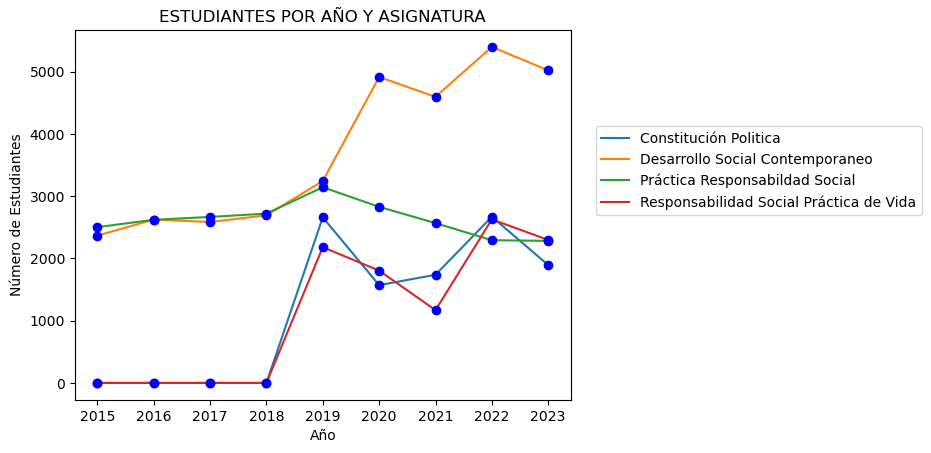

In [26]:
#Creación de un Line chart ussando la función crosstab() en pandas python 
Año_Asignatura.plot(kind='line')
plt.xlabel('Año')
plt.ylabel('Número de Estudiantes')
plt.title('ESTUDIANTES POR AÑO Y ASIGNATURA')
plt.legend(loc=(1.05,.5))
plt.plot(Año_Asignatura,'bo',color='blue')
plt.show()

In [27]:
# Se crea una tabla de contigencia llamada "Año_Asignatura", la cual muetsra la cantidad de estudiantes que cursaron las asignaturas por año
Año_Asignatura = pd.crosstab([dfAsig.Año],dfAsig.Asignatura,margins=True,margins_name='Total Estudiantes')
Año_Asignatura

Asignatura,Constitución Politica,Desarrollo Social Contemporaneo,Práctica Responsabildad Social,Responsabilidad Social Práctica de Vida,Total Estudiantes
Año,,,,,
2015,0,2365,2502,0,4867
2016,0,2624,2620,0,5244
2017,0,2585,2666,0,5251
2018,0,2692,2720,0,5412
2019,2659,3244,3143,2180,11226
2020,1570,4914,2828,1804,11116
2021,1737,4595,2567,1169,10068
2022,2669,5397,2292,2627,12985
2023,1893,5020,2282,2296,11491


In [28]:
# Se crea la tabla de contigencia llamada "Asignaturas", la cual muestra la cantidad de estudiantes que ralizaron alguna asginatura por Periodo
Asignaturas=pd.crosstab([dfAsig.Periodo],dfAsig.Asignatura)
Asignaturas

Asignatura,Constitución Politica,Desarrollo Social Contemporaneo,Práctica Responsabildad Social,Responsabilidad Social Práctica de Vida
Periodo,,,,
201510,0,1137,1023,0
201530,0,55,366,0
201560,0,1173,1113,0
201610,0,1314,1089,0
201630,0,75,409,0
201660,0,1235,1122,0
201710,0,1270,1061,0
201730,0,74,476,0
201760,0,1241,1129,0


In [29]:
# Se crea una tabla de contigencia llamada "Asignaturas", la cual muestra la cantidad de estudiantes que cursaron alguna asignatura por año
Asignaturas=pd.crosstab([dfAsig.Periodo],dfAsig.Asignatura,margins=True,margins_name='Total Estudiantes')
Asignaturas

Asignatura,Constitución Politica,Desarrollo Social Contemporaneo,Práctica Responsabildad Social,Responsabilidad Social Práctica de Vida,Total Estudiantes
Periodo,,,,,
201510,0,1137,1023,0,2160
201530,0,55,366,0,421
201560,0,1173,1113,0,2286
201610,0,1314,1089,0,2403
201630,0,75,409,0,484
201660,0,1235,1122,0,2357
201710,0,1270,1061,0,2331
201730,0,74,476,0,550
201760,0,1241,1129,0,2370


In [30]:
# Se crea una tabla de contigencia llamada "linea_Pro", la cuál muestra la cantidad de estudiantes viculados por linea de proyecto de formación social 
linea_Pro = pd.crosstab([dfAsig.Programa],dfAsig.Linea_Proyecto_PSF)
linea_Pro

Linea_Proyecto_PSF,Ciencia Y Tecnologia,"Ciudadanías, Comunicación, Ciencia Y Tecnología",Comunidad Y Tejido Social,"Comunidades, Territorios Y Tejido Social",Ecologia Integral,Ecologías Y Éticas Para La Vida,Economias Sociales,Economías Y Emprendimientos Sociales,Economías Y Emprendimientos Sociales,Educacion Y Cultura,Educación Y Cultura,"Educación, Participación Y Cambio Social",Sin Registro,Territorios Y Tejido Social,Territorios Y Tejido Social
Programa,,,,,,,,,,,,,,,
Adm Emp Turisticas Y Hoteleras,108,0,3,0,40,0,3,0,0,56,13,0,567,40,1
Admin Seguridad Salud Trabajo,369,20,0,22,190,31,5,0,0,159,87,49,2146,150,26
Administrac Salud Ocupacional,146,1,27,1,64,0,20,0,0,126,2,0,644,57,0
Administracion Financiera,177,2,5,11,84,4,3,0,0,87,29,10,973,70,6
Administración De Empresas,67,652,0,344,102,198,10,53,91,1,131,360,2525,40,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tp Manejo De Microcreditos,5,0,0,1,4,0,0,0,0,0,0,0,3,3,0
Tp Procesos De Almacenamiento,44,0,0,0,30,0,0,0,0,9,0,1,119,10,0
Tp Prod Sonido En Vivo Audiovi,2,3,0,4,2,1,0,1,0,0,1,0,1,0,0


In [31]:
# Se crea una tabla de contigencia llamada "Moda_linea", la cuál muestra la cantidad de estudiantes vinculados a una línea de proyecto de formación social por modalidad y Programa
Moda_linea = pd.crosstab([dfAsig.Modalidad,dfAsig.Programa],dfAsig.Linea_Proyecto_PSF)
Moda_linea

Linea_Proyecto_PSF                         Ciencia Y Tecnologia  \
Modalidad  Programa                                               
Distancia  Adm Emp Turisticas Y Hoteleras                   108   
           Admin Seguridad Salud Trabajo                    366   
           Administrac Salud Ocupacional                    146   
           Administracion Financiera                        177   
           Administración De Empresas                        52   
...                                                         ...   
Presencial Tec Redes Comp Seg Informatica                     0   
           Tecnología Comunicación Gráfic                    10   
           Tecnología En Electrónica                          0   
           Tp Prod Sonido En Vivo Audiovi                     2   
           Trabajo Social                                    11   

Linea_Proyecto_PSF                         Ciudadanías, Comunicación, Ciencia Y Tecnología  \
Modalidad  Programa                                                                          
Distancia  Adm Emp Turisticas Y Hoteleras                                                0   
           Admin Seguridad Salud Trabajo                                                 7   
           Administrac Salud Ocupacional                                                 1   
           Administracion Financiera                                                     2   
           Administración De Empresas                                                   16   
...                                                                                    ...   
Presencial Tec Redes Comp Seg Informatica                                               96   
           Tecnología Comunicación Gráfic                                              268   
           Tecnología En Electrónica                                                   110   
           Tp Prod Sonido En Vivo Audiovi                                                3   
           Trabajo Social                                                              278   

Linea_Proyecto_PSF                         Comunidad Y Tejido Social  \
Modalidad  Programa                                                    
Distancia  Adm Emp Turisticas Y Hoteleras                          3   
           Admin Seguridad Salud Trabajo                           0   
           Administrac Salud Ocupacional                          27   
           Administracion Financiera                               5   
           Administración De Empresas                              0   
...                                                              ...   
Presencial Tec Redes Comp Seg Informatica                          0   
           Tecnología Comunicación Gráfic                          0   
           Tecnología En Electrónica                               0   
           Tp Prod Sonido En Vivo Audiovi                          0   
           Trabajo Social                                          0   

Linea_Proyecto_PSF                         Comunidades, Territorios Y Tejido Social  \
Modalidad  Programa                                                                   
Distancia  Adm Emp Turisticas Y Hoteleras                                         0   
           Admin Seguridad Salud Trabajo                                         14   
           Administrac Salud Ocupacional                                          1   
           Administracion Financiera                                             11   
           Administración De Empresas                                            35   
...                                                                             ...   
Presencial Tec Redes Comp Seg Informatica                                        29   
           Tecnología Comunicación Gráfic                                       151   
           Tecnología En Electrónica                                             34   
           

In [32]:
# Se crea una tabla de contigencia llamada "Modalidad" con la función crosstab, la cuál muestra la cantidad de estudiantes en la modalidad Distanci y Presencial por Línea de proyecto
Modalidad = pd.crosstab([dfAsig.Linea_Proyecto_PSF],dfAsig.Modalidad)
Modalidad

Modalidad,Distancia,Presencial
Linea_Proyecto_PSF,,
Ciencia Y Tecnologia,3350,299
"Ciudadanías, Comunicación, Ciencia Y Tecnología",130,7870
Comunidad Y Tejido Social,231,0
"Comunidades, Territorios Y Tejido Social",217,5383
Ecologia Integral,1629,177
Ecologías Y Éticas Para La Vida,177,2561
Economias Sociales,96,95
Economías Y Emprendimientos Sociales,0,742
Economías Y Emprendimientos Sociales,0,671


# BD Encuestas de Opinion PRS Histórico

In [33]:
# Se crea una lista llamada "EstadoCivil" la cual contiene los estados civil de una persona en Colombia
EstadoCivil={'Soltero(a)','Casado(a)','Unión Libre','Separado(a) / Divorciado(a)','Viudo(a)','Sin Registro',}

In [34]:
# Ingreso de la ruta del del archivo Maestro 2
enlace2 = input("Digite la ruta de acceso del archivo maestro2 a cargar: \n")
print('\n')
hoja = input("Nota: Si el archivo contiene más de una hoja por favor ingresar el nombre de la hoja donde se encuentra la data")
if not hoja:
    dfMaestro2 = pd.read_excel(enlace2)
else:
    dfMaestro2 = pd.read_excel(enlace2,sheet_name=hoja)
dfMaestro2

Digite la ruta de acceso del archivo maestro2 a cargar: 
 D:/Especializacion_BIGDATA/Proyecto de grado/DATA OFICIAL MONOGRAFIA/2.BD Encuestas de Opinion PRS Histórico.xlsx


Nota: Si el archivo contiene más de una hoja por favor ingresar el nombre de la hoja donde se encuentra la data DATOS Encuestas


,Periodo,Modalidad,Año,Sem,Area,Programa,Universidad,PS1/PS2,Proyecto,Carrera,Género,Estrato,Estado_Civil,Edad,F_Personal,F_Profesional,Grado_S
0,2014-1,Presencial,2014,Primer semestre,Sin Vigencia,Sin Vigencia,Corporación Universitaria Minuto de Dios,Práctica en Responsabilidad Social,Voces Ciudad Bolívar,Lic Educacion Infantil,Femenino,Sin Registro,Unión Libre,26,4.0,4.0,4.0
1,2014-1,Presencial,2014,Primer semestre,Sin Vigencia,Sin Vigencia,Corporación Universitaria Minuto de Dios,Práctica en Responsabilidad Social,Alfabetizacion En El Manejo De La Información,Tec Gestion Segurid Redes Comp,Masculino,Sin Registro,Soltero,27,5.0,5.0,5.0
2,2014-1,Presencial,2014,Primer semestre,Sin Vigencia,Sin Vigencia,Corporación Universitaria Minuto de Dios,Práctica en Responsabilidad Social,Educación Inclusiva,Psicología,Femenino,Sin Registro,Soltero,26,5.0,4.0,3.0
3,2014-1,Presencial,2014,Primer semestre,Sin Vigencia,Sin Vigencia,Corporación Universitaria Minuto de Dios,Práctica en Responsabilidad Social,Voces Ciudad Bolívar,Ingeniería Industrial,Femenino,Sin Registro,Soltero,28,4.0,5.0,5.0
4,2014-1,Presencial,2014,Primer semestre,Sin Vigencia,Sin Vigencia,Corporación Universitaria Minuto de Dios,Práctica en Responsabilidad Social,Educación Inclusiva,Lic Educacion Infantil,Femenino,Sin Registro,Soltero,26,4.0,4.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19710,202310,Presencial,2023,Primer semestre,Sin Vigencia,Sin Vigencia,Corporación Universitaria Minuto de Dios,Práctica en Responsabilidad Social,Ambiente Y Ciudadania,Comunicación Social - Periodismo,Sin Registro,Sin Registro,Sin Registro,Sin Registro,4.0,3.0,4.0
19711,202310,Presencial,2023,Primer semestre,Sin Vigencia,Sin Vigencia,Corporación Universitaria Minuto de Dios,Práctica en Responsabilidad Social,Ambiente Y Ciudadania,Ingeniería Civil,Sin Registro,Sin Registro,Sin Registro,Sin Registro,NaN,NaN,NaN
19712,202310,Presencial,2023,Primer semestre,Sin Vigencia,Sin Vigencia,Corporación Universitaria Minuto de Dios,Práctica en Responsabilidad Social,Pedagogías Para El Encuentro,Licenciatura en Educación Física,Sin Registro,Sin Registro,Sin Registro,Sin Registro,5.0,5.0,5.0
19713,202310,Presencial,2023,Primer semestre,Sin Vigencia,Sin Vigencia,Corporación Universitaria Minuto de Dios,Práctica en Responsabilidad Social,Pedagogías Para El Encuentro,Tecnología en Comunicación Gráfica,Sin Registro,Sin Registro,Sin Registro,Sin Registro,4.0,4.0,4.0


In [35]:
# Función para encontrar coincidencias aproximadas entre el DataFrame y la lista
def encontrar_coincidencias_EstadoCivil(df, lista, columna):
    coincidencias = []
    for estado in df[columna]:
        # Utiliza process.extractOne para obtener la mejor coincidencia en la lista
        mejor_coincidencia, puntaje = process.extractOne(estado, lista)
        
        # Puedes establecer un umbral de puntaje para considerar la coincidencia
        if puntaje >= 70:
            coincidencias.append((mejor_coincidencia))
        else:
            EstadoCivil.append(estado)
    return coincidencias

# Encuentra coincidencias aproximadas en los nombres del DataFrame y la lista
dfMaestro2['Nuevo_Estado_Civil'] = encontrar_coincidencias_EstadoCivil(dfMaestro2, EstadoCivil, 'Estado_Civil')

In [36]:
# Se muestra los tipos de datos del dataframe
dfMaestro2.dtypes

Periodo                object
Modalidad              object
Año                     int64
Sem                    object
Area                   object
Programa               object
Universidad            object
PS1/PS2                object
Proyecto               object
Carrera                object
Género                 object
Estrato                object
Estado_Civil           object
Edad                   object
F_Personal            float64
F_Profesional         float64
Grado_S               float64
Nuevo_Estado_Civil     object
dtype: object

In [37]:
# Se valida datos vacios en la columna Edad del dataframe dfMaestro2 y se reemplazan por un 0
dfMaestro2 = dfMaestro2.fillna({'Edad':'0'})

In [38]:
# Se crea una lista "New_Edad" y se recorre los datos de la columna Edad del dataframe dfMaestro2 para reemplazar el signo "-" 
# por un espacio, donde sea necesario y luego el nuevo dato lo almacena en la lista "New_Edad", y luego se reemplazan los datos de la columna
# Edad por los datos de la lista
New_Edad=[]
for string in dfMaestro2['Edad']:
    string=str(string)
    new_string = string.replace('-', '')
    New_Edad.append(new_string)
dfMaestro2['Edad'] = New_Edad

In [39]:
# Se reemplazan por "Sin Registro" los datos de la columna Edad donde sean 0, para ello se usa la función Lambda
dfMaestro2['Edad']=dfMaestro2['Edad'].apply(lambda x: x.replace('Sin Registro','0')if 'Sin Registro' in str(x) else x)

In [40]:
# Se visualiza el tipo de dato que estan en el datafram dfMaestro2
dfMaestro2.dtypes

Periodo                object
Modalidad              object
Año                     int64
Sem                    object
Area                   object
Programa               object
Universidad            object
PS1/PS2                object
Proyecto               object
Carrera                object
Género                 object
Estrato                object
Estado_Civil           object
Edad                   object
F_Personal            float64
F_Profesional         float64
Grado_S               float64
Nuevo_Estado_Civil     object
dtype: object

In [41]:
# Se convierte el tipo de dato en la columna Edad, de tipo Object a Int64
dfMaestro2['Edad'] = dfMaestro2['Edad'].astype('int64')

In [42]:
# se valida los datos nulos de la columna Edad
dfMaestro2[dfMaestro2['Edad'].isnull()]

,Periodo,Modalidad,Año,Sem,Area,Programa,Universidad,PS1/PS2,Proyecto,Carrera,Género,Estrato,Estado_Civil,Edad,F_Personal,F_Profesional,Grado_S,Nuevo_Estado_Civil


In [43]:
# Se realiza la suma de todos los datos nulo o vacios que hay en las columna
dfMaestro2.isnull().sum()

Periodo               0
Modalidad             0
Año                   0
Sem                   2
Area                  0
Programa              0
Universidad           0
PS1/PS2               0
Proyecto              0
Carrera               0
Género                0
Estrato               0
Estado_Civil          0
Edad                  0
F_Personal            1
F_Profesional         2
Grado_S               2
Nuevo_Estado_Civil    0
dtype: int64

In [44]:
# Se recorren los datos del la columna Periodo y se toma el cuarto caracter para validar si es el signo "-"
i = 0
Año=[]
if i <=len(dfMaestro2['Periodo ']):
    for per in dfMaestro2['Periodo ']:
        i = i + 1
        #columnP = str(columnP)
        per = str(per)
        guion = per[4]
        columnP = per[4:]
        año = per[:4]
        #print (guion)
        if guion == '-':
            match columnP:
                case '-1':
                    Año.append(año+'10')
                case '-2':
                    Año.append(año+'60')
                case '-1i':
                    Año.append(año+'30')
                case '-2i':
                    Año.append(año+'30')
                case '-10':
                    Año.append(año+'10')
        else:
            Año.append(per)
dfMaestro2['New_Periodo'] = Año

In [45]:
# Cambio de nombres de las columnas
dfMaestro2 = dfMaestro2.rename(columns={'New_Periodo':'Periodo','Sem':'Semestre','Programa':'Old_Programa','Carrera':'Programa','Género':'Genero','Estado_Civil':'Old_Estado_Civil','Nuevo_Estado_Civil':'Estado_Civil','F_Personal':'Grado_Satisfaccion_Personal','F_Profesional':'Grado_Satisfaccion_Profesional','Grado_S':'Grado_Satisfaccion_General'})

In [46]:
dfMaestro2['Edad'].fillna(dfMaestro2['Edad'].mean(), inplace=True)

In [47]:
promEdad = dfMaestro2['Edad'].mean()
dfMaestro2['Edad'] = dfMaestro2['Edad'].replace({0:promEdad})

In [48]:
dfMaestro2 = dfMaestro2[dfMaestro2["Grado_Satisfaccion_Personal"].notna()]
dfMaestro2 = dfMaestro2[dfMaestro2["Grado_Satisfaccion_Profesional"].notna()]
dfMaestro2 = dfMaestro2[dfMaestro2["Grado_Satisfaccion_General"].notna()]

In [49]:
dfMaestro2.loc[dfMaestro2.Periodo=='202030','Semestre']='Intersemestral'
dfMaestro2.loc[dfMaestro2.Periodo=='202260','Semestre']='Intersemestral'

In [50]:
dfMaestro2[dfMaestro2['Semestre'].isnull()]

,Periodo,Modalidad,Año,Semestre,Area,Old_Programa,Universidad,PS1/PS2,Proyecto,Programa,Genero,Estrato,Old_Estado_Civil,Edad,Grado_Satisfaccion_Personal,Grado_Satisfaccion_Profesional,Grado_Satisfaccion_General,Estado_Civil,Periodo


In [51]:
dfMaestro2=dfMaestro2.rename(columns={'PS1/PS2':'Asignatura'})

In [52]:
dfMaestro2['Asignatura'] = dfMaestro2['Asignatura'].replace({'PRS':'Práctica en Responsabilidad Social','PS2':'Práctica Social 2'})

In [53]:
dfMaestro2= dfMaestro2.loc[:,['Modalidad','Periodo','Año','Semestre','Asignatura','Proyecto','Programa','Genero','Estado_Civil','Edad','Grado_Satisfaccion_Personal','Grado_Satisfaccion_Profesional','Grado_Satisfaccion_General']]

In [54]:
dfMaestro2['Edad'] = np.array(dfMaestro2['Edad'], dtype=np.int64)

In [55]:
unique_pro={'Técnico Profesional en Producción de Sonido en Vivo y Audiovisual ',
'Licenciatura en Humanidades y Lengua Castellana  ',
'Licenciatura en Educación Artística',
'Licenciatura en Informática  ',
'Licenciatura en Educación Física ',
'Licenciatura en Lenguas Extranjeras con Énfasis en Inglés ',
'Licenciatura en Educación Infantil ',
'Licenciatura en Educación Física en Recreación y Deportes ',
'Licenciatura en Educación Artística ',
'Licenciatura Idioma Extranjero Ingles ',
'Licenciatura en Pedagogía Infantil ',
'Licenciatura Básica Educación Artística ',
'Tecnología en Gestión del Talento Humano ',
'Tecnología en Gestión de Mercadeo ',
'Administración en Seguridad y Salud en el Trabajo ',
'Administración de Empresas ',
'Contaduría Pública ',
'Tecnología Costos y Auditoría',
'Tecnología en Comunicación Gráfica  ',
'Tecnología en Realización Audiovisual ',
'Comunicación Social y Periodismo',
'Comunicación Visual ',
'Ciencias Bíblicas  ',
'Trabajo Social',
'Estudios en Filosofía ',
'Licenciatura en Filosofía',
'Psicología ',
'Tecnología en Electrónica',
'Tecnología en Informática',
'Tecnología en Logística Empresarial ',
'Ingeniería Civil ',
'Ingeniería Agroecológica ',
'Ingeniería de Sistemas ',
'Ingeniería Industrial ',
'Tecnología Gestión Seguridad Redes Computadores',
'Licenciatura en Educación Básica con Enfasís en Ciencias Naturales y  Educación Ambiental  ',
'Licenciatura en Ciencias Naturales y Educación Ambiental',
'Licenciatura en Educación Infantil',
'Licenciatura en Idioma Extranjero Inglés (DIST)',
'Administración Financiera',
'Administración de Empresas',
'Administración Seguridad y Salud en el Trabajo',
'Administración de Empresas Turísticas y Hoteleras',
'Administración  Salud Ocupacional ',
'Comunicación Social',
'Ingeniería Industrial',
'Tecnología en Logística ',
'Tecnnología en Redes Computación  Seguridad Informatica',
'Sin Registro'}
print (len(unique_pro))

49


In [56]:
def reemplaza_valores():
    carrera=[]
    i=0
    if i <=len(dfMaestro2['Programa']):
        for car in dfMaestro2['Programa']:
            car = car.replace('.',' ')
            car = car.replace('Lic ','Licenciatura ')
            car = car.replace('Contabilidad','Contaduría')
            car = car.replace('Bás','Básica')
            car = car.replace('ING ','Ingeniería ')
            car = car.replace('Ing ','Ingeniería ')
            car = car.replace('Edu ','Educación ')
            car = car.replace('Educ ','Educación ')            
            carrera.append(car)
    dfMaestro2['Nuevo_Programa'] = carrera

In [57]:
from fuzzywuzzy import fuzz, process
import pandas as pd

dfMaestro2['Programa'] = dfMaestro2['Programa'].str.title()

# Función para encontrar coincidencias aproximadas entre el DataFrame y la lista
def encontrar_coincidencias_aproximadas(df, lista, columna):
    coincidencias = []
    nocoinciden=[]
    reemplaza_valores()
    for nombre1 in df[columna]:
        # Utiliza process.extractOne para obtener la mejor coincidencia en la lista
        mejor_coincidencia, puntaje = process.extractOne(nombre1, lista)
        
        # Puedes establecer un umbral de puntaje para considerar la coincidencia
        if puntaje >= 85:
            coincidencias.append((mejor_coincidencia))
        else:
            coincidencias.append((nombre1))
    #print('No coinciden')
    #print(len(nocoinciden))
    #print (nocoinciden)
    return coincidencias

# Encuentra coincidencias aproximadas en los nombres del DataFrame y la lista
coincidencias = encontrar_coincidencias_aproximadas(dfMaestro2, unique_pro, 'Nuevo_Programa')
dfMaestro2['Nuevo_Programa'] = coincidencias


In [58]:
dfMaestro2.to_excel('D:\\Especializacion_BIGDATA\\Proyecto de grado\\Data con ETL\\2.BD Encuestas de Opinion PRS Histórico.xlsx', index=False)

In [59]:
Prom_Mod = pd.crosstab(index=dfMaestro2['Nuevo_Programa'], columns=dfMaestro2['Modalidad'], values=dfMaestro2['Grado_Satisfaccion_Personal'],rownames=['Programa'], aggfunc="mean")
Prom_Mod = Prom_Mod.rename(columns={'Nuevo_Programa':'Programa'})
Prom_Mod=Prom_Mod.round(2)
Prom_Mod

Modalidad,Distancia,Presencial
Programa,,
2022-1,NaN,4.00
Administración Financiera,4.50,4.50
Administración Seguridad y Salud en el Trabajo,NaN,4.08
Administración de Empresas,4.33,4.45
Administración de Empresas Turísticas y Hoteleras,4.50,4.17
...,...,...
Tecnología en Logística Empresarial,NaN,4.49
Tecnología en Realización Audiovisual,NaN,4.23
Trabajo Social,5.00,4.41


In [60]:
import math
Pro_Mod_Personal = pd.crosstab(index=dfMaestro2.Año, columns=dfMaestro2.Modalidad, values=dfMaestro2.Grado_Satisfaccion_Personal, aggfunc='mean')
Pro_Mod_Personal=Pro_Mod_Personal.round(2) 
Pro_Mod_Personal = Pro_Mod_Personal.fillna({'Distancia':'0'})
Pro_Mod_Personal

Modalidad,Distancia,Presencial
Año,,
2014,0,4.47
2015,0,4.48
2016,0,4.50
2017,0,4.45
2018,0,4.45
2019,0,4.34
2020,0,4.31
2021,0,4.31
2022,0,4.33


In [61]:
Pro_Mod_Profe = pd.crosstab(index=dfMaestro2.Año, columns=dfMaestro2.Modalidad, values=dfMaestro2.Grado_Satisfaccion_Profesional, aggfunc='mean')
Pro_Mod_Profe=Pro_Mod_Profe.round(2)
Pro_Mod_Profe = Pro_Mod_Personal.fillna({'Distancia':'0'})
Pro_Mod_Profe

Modalidad,Distancia,Presencial
Año,,
2014,0,4.47
2015,0,4.48
2016,0,4.50
2017,0,4.45
2018,0,4.45
2019,0,4.34
2020,0,4.31
2021,0,4.31
2022,0,4.33


# CEDPRS Historial Organizaciones PSF

In [62]:
enlace3 = input("Digite la ruta de acceso del archivo maestro 3 a cargar: \n")
print('\n')
hoja = input("Nota: Si el archivo contiene más de una hoja por favor ingresar el nombre de la hoja donde se encuentra la data")
if not hoja:
    dfMaestro3 = pd.read_excel(enlace3)
else:
    dfMaestro3 = pd.read_excel(enlace3,sheet_name=hoja)
dfMaestro3

Digite la ruta de acceso del archivo maestro 3 a cargar: 
 D:/Especializacion_BIGDATA/Proyecto de grado/DATA OFICIAL MONOGRAFIA/3.CEDPRS Historial Organizaciones PSF.xlsx


Nota: Si el archivo contiene más de una hoja por favor ingresar el nombre de la hoja donde se encuentra la data 


,Año,Semestre,Nombre Proyecto PSF,Nombre Organización,Tipo Organización,Localidad,Condición
0,2016,201610,Ambiente y Ciudadanía,Colegio Integral Avancemos,Sin Registro,San Cristobal,Sin Registro
1,2016,201660,Ambiente y Ciudadanía,Colegio Integral Avancemos,Sin Registro,San Cristobal,Sin Registro
2,2016,201610,Comercio Justo y Consumo Responsable,Ingenieria Agroecológica UNIMINUTO S.P,Sin Registro,Engativá,Sin Registro
3,2016,201660,Comercio Justo y Consumo Responsable,Ingenieria Agroecológica UNIMINUTO S.P,Sin Registro,Engativá,Sin Registro
4,2016,201610,Ambiente y Ciudadanía,Unidad Ambiental Calle 80,Sin Registro,Engativá,Sin Registro
...,...,...,...,...,...,...,...
1455,2023,2023-10,TEJIENDO TERRITORIO CIUDAD BOLÍVAR,Fundación Analizar pro sueños,ORGANIZACION SOCIAL INDIVIDUAL,Ciudad Bolívar,Sin Registro
1456,2023,2023-10,SINTONÍZATE EN COMUNIDAD,JAC San Bernardo,ORGANIZACION SOCIAL INDIVIDUAL,Santa Fe,Sin Registro
1457,2023,2023-10,SINTONÍZATE EN COMUNIDAD,JAC Eduardo Santos,ORGANIZACION SOCIAL INDIVIDUAL,Los Mártires,Sin Registro
1458,2023,2023-10,SINTONÍZATE EN COMUNIDAD,Colegio Agustin Nieto,ORGANIZACION SOCIAL INDIVIDUAL,Los Mártires,Sin Registro


In [63]:
New_Periodo=[]
for string in dfMaestro3['Semestre']:
    string=str(string)
    new_string = string.replace('-', '')
    New_Periodo.append(new_string)
dfMaestro3['Periodo'] = New_Periodo

In [64]:
dfMaestro3['Periodo'] = np.array(dfMaestro3['Periodo'], dtype=np.int64)

In [65]:
dfMaestro3 = dfMaestro3.rename(columns={'Nombre Proyecto PSF':'Proyecto_PSF','Nombre Organización':'Nombre_Organización','Tipo Organización':'Tipo_Organización'})

In [66]:
dfMaestro3.isnull().sum()

Año                    0
Semestre               0
Proyecto_PSF           0
Nombre_Organización    0
Tipo_Organización      0
Localidad              2
Condición              0
Periodo                0
dtype: int64

In [67]:
dfMaestro3 = dfMaestro3.fillna({'Localidad': 'Sin Registro'})

In [68]:
localidades=['Usaquén',
'Chapinero',
'Santa Fe',
'San Cristóbal',
'Usme',
'Tunjuelito',
'Bosa',
'Kennedy',
'Fontibón',
'Engativá',
'Suba',
'Barrios Unidos',
'Teusaquillo',
'Los Mártires',
'Antonio Nariño'
]

In [69]:
def encontrar_coincidencias_aproximadas(df, lista, columna):
    coincidencias = []
    nocoinciden=[]
    #reemplaza_valores()
    for nombre1 in df[columna]:
        # Utiliza process.extractOne para obtener la mejor coincidencia en la lista
        mejor_coincidencia, puntaje = process.extractOne(nombre1, lista)
        
        # Puedes establecer un umbral de puntaje para considerar la coincidencia
        if puntaje >= 95:
            coincidencias.append((mejor_coincidencia))
        else:
            coincidencias.append((nombre1))
    return coincidencias

# Encuentra coincidencias aproximadas en los nombres del DataFrame y la lista
coincidencias = encontrar_coincidencias_aproximadas(dfMaestro3, localidades, 'Localidad')
dfMaestro3['Localidad'] = coincidencias

In [70]:
dfMaestro3['Condición'] = dfMaestro3['Condición'].replace({'Organizació':'Organización'})

In [71]:
dfMaestro3['Tipo_Organización'] = dfMaestro3['Tipo_Organización'].replace({'Organizacion Social Individual':'Organización Social Individual'})

In [72]:
dfMaestro3 = dfMaestro3.loc[:,['Año','Periodo','Proyecto_PSF','Nombre_Organización','Tipo_Organización','Localidad','Condición']]

In [73]:
# Cambiar de mayúsculas y minusculas a la primera letra de cada palabra a mayúscula de todas las columnas

for column in dfMaestro3:
    if dfMaestro3[column].dtypes == 'object':
        dfMaestro3[column] = dfMaestro3[column].str.title()

In [74]:
dfMaestro3.to_excel('D:\\Especializacion_BIGDATA\\Proyecto de grado\\Data con ETL\\3.CEDPRS Historial Organizaciones PSF.xlsx', index=False)

In [75]:
count = dfMaestro3['Nombre_Organización'].nunique()
count

467

In [76]:
dfOrganizaciones=pd.DataFrame(dfMaestro3['Nombre_Organización'].unique().tolist(),columns=['Organizacion'])
dfOrganizaciones

,Organizacion
0,Colegio Integral Avancemos
1,Ingenieria Agroecológica Uniminuto S.P
2,Unidad Ambiental Calle 80
3,Acj Shekinah
4,Agencia Techotiba
...,...
462,Fundación Analizar Pro Sueños
463,Jac San Bernardo
464,Jac Eduardo Santos
465,Colegio Agustin Nieto


In [77]:
año_Organizacion = pd.DataFrame(dfMaestro3.groupby(['Año','Nombre_Organización','Localidad'],group_keys=True)['Nombre_Organización'].count())
año_Organizacion = año_Organizacion.rename(columns={'Nombre_Organización':'Cantidad'})
año_Organizacion

Cantidad
Año  Nombre_Organización                     Localidad               
2016   Colegio Integral Avancemos            San Cristóbal          2
      Ingenieria Agroecológica Uniminuto S.P Engativá               2
     Acj Shekinah                            Ciudad Bolívar         2
     Agencia Techotiba                       Kennedy                2
     Asociacion Asitrib                      Bosa                   1
...                                                               ...
2023 Uniminuto Observatorio Tingra           Engativá               1
     Uniminuto Programa Consumo Con Poder    Engativá               1
     Uniminuto Ruta Sostenibilidad           Engativá               1
     Uniminuto Subatic                       Suba                   2
     Yo Amo La Vida - Br Santo Domingo       Ciudad Bolívar         3

[838 rows x 1 columns]

In [78]:
Sem_Organizacion = pd.DataFrame(dfMaestro3.groupby(['Periodo','Nombre_Organización','Localidad'],group_keys=True)['Nombre_Organización'].count())
Sem_Organizacion = Sem_Organizacion.rename(columns={'Nombre_Organización':'Cantidad'})
Sem_Organizacion

Cantidad
Periodo Nombre_Organización                     Localidad               
201610    Colegio Integral Avancemos            San Cristóbal          1
         Ingenieria Agroecológica Uniminuto S.P Engativá               1
        Acj Shekinah                            Ciudad Bolívar         1
        Agencia Techotiba                       Kennedy                1
        Asociacion Asitrib                      Bosa                   1
...                                                                  ...
202310  Uniminuto Observatorio Tingra           Engativá               1
        Uniminuto Programa Consumo Con Poder    Engativá               1
        Uniminuto Ruta Sostenibilidad           Engativá               1
        Uniminuto Subatic                       Suba                   2
        Yo Amo La Vida - Br Santo Domingo       Ciudad Bolívar         3

[1215 rows x 1 columns]

# Histórico Estadísticas Participantes Beneficiarios de PSF

In [79]:
enlace4 = input("Digite la ruta de acceso del archivo maestro 4 a cargar: \n")
print('\n')
hoja = input("Nota: Si el archivo contiene más de una hoja por favor ingresar el nombre de la hoja donde se encuentra la data")
if not hoja:
    dfMaestro4 = pd.read_excel(enlace4)
else:
    dfMaestro4 = pd.read_excel(enlace4,sheet_name=hoja)
dfMaestro4

Digite la ruta de acceso del archivo maestro 4 a cargar: 
 D:/Especializacion_BIGDATA/Proyecto de grado/DATA OFICIAL MONOGRAFIA/4. Histórico Estadísticas Participantes Beneficiarios de PSF.xlsx


Nota: Si el archivo contiene más de una hoja por favor ingresar el nombre de la hoja donde se encuentra la data 


,Año,Periodo,Proyecto PSF,Linea de Proyecto PSF,Tipo Población,Grupo Etáreo,Nº de Participantes,MODALIDAD
0,2017,201710,Voces Ciudad Bolivar,"Comunidades, Territorios y Tejido Social",Población Permanente,Primera Infancia (0 - 5 años),88,PRESENCIAL
1,2017,201710,Voces Ciudad Bolivar,"Comunidades, Territorios y Tejido Social",Población Permanente,Niñez (6 - 11 años),360,PRESENCIAL
2,2017,201710,Voces Ciudad Bolivar,"Comunidades, Territorios y Tejido Social",Población Permanente,Jóvenes (12 - 26 años),73,PRESENCIAL
3,2017,201710,Voces Ciudad Bolivar,"Comunidades, Territorios y Tejido Social",Población Permanente,Adultos (26 - 60 años),15,PRESENCIAL
4,2017,201710,Voces Ciudad Bolivar,"Comunidades, Territorios y Tejido Social",Población Permanente,Adultos Mayores (más de 60 años),50,PRESENCIAL
...,...,...,...,...,...,...,...,...
2123,2023,2023-40,TEJIENDO TERRITORIO CIUDAD BOLÍVAR,TERRITORIOS Y TEJIDO SOCIAL,Población Permanente,2 Niñez (6-11 años),15,DISTANCIA
2124,2023,2023-40,SINTONÍZATE EN COMUNIDAD,TERRITORIOS Y TEJIDO SOCIAL,Población Permanente,3 Jóvenes (12-26 años),30,DISTANCIA
2125,2023,2023-40,SINTONÍZATE EN COMUNIDAD,TERRITORIOS Y TEJIDO SOCIAL,Población Permanente,3 Jóvenes (12-26 años),30,DISTANCIA
2126,2023,2023-40,SINTONÍZATE EN COMUNIDAD,TERRITORIOS Y TEJIDO SOCIAL,Población Permanente,4 Adultos (26-60 años),30,DISTANCIA


In [80]:
dfMaestro4 = dfMaestro4.rename(columns={'Tipo Población':'Tipo_Población','Proyecto PSF':'Proyecto_PSF','Linea de Proyecto PSF':'Linea_Proyecto_PSF','Grupo Etáreo':'Grupo_Etareo','Nº de Participantes':'Numero_de_Participantes','MODALIDAD':'Modalidad'})

In [81]:
dfMaestro4= dfMaestro4.fillna({'Numero_de_Participantes':0})

In [82]:
dfMaestro4['Grupo_Etareo'] = dfMaestro4['Grupo_Etareo'].replace({'1 Primera infancia (0-5 años)':'Primera Infancia (0 - 5 años)','2 Niñez (6-11 años)':'Niñez (6 - 11 años)','3 Jóvenes (12-26 años)':'Jóvenes (12 - 26 años)','4 Adultos (26-60 años)':'Adultos (26 - 60 años)','Adultos (26-60 años)':'Adultos (26 - 60 años)','5 Adultos mayores (mayores de 60)':'Adultos Mayores (más de 60 años)','Adultos mayores (mayores de 60)':'Adultos Mayores (más de 60 años)','6 Todas las anteriores ':'Todas las anteriores'})

In [83]:
dfMaestro4.dtypes

Año                         int64
Periodo                    object
Proyecto_PSF               object
Linea_Proyecto_PSF         object
Tipo_Población             object
Grupo_Etareo               object
Numero_de_Participantes    object
Modalidad                  object
dtype: object

In [84]:
dfMaestro4['Numero_de_Participantes'] = pd.to_numeric(dfMaestro4['Numero_de_Participantes'], errors='coerce')

In [85]:
dfMaestro4['Numero_de_Participantes'][dfMaestro4['Numero_de_Participantes'].isnull()]=0

C:\Users\ingiv\AppData\Local\Temp\ipykernel_11652\1225605086.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfMaestro4['Numero_de_Participantes'][dfMaestro4['Numero_de_Participantes'].isnull()]=0


In [86]:
dfMaestro4['Numero_de_Participantes'] = dfMaestro4['Numero_de_Participantes'].astype('int64')

In [87]:
dfMaestro4.loc[dfMaestro4.Periodo=='2023-10','Periodo']='202310'
dfMaestro4.loc[dfMaestro4.Periodo=='2023-40','Periodo']='202340'

In [88]:
dfMaestro4['Periodo'] = dfMaestro4['Periodo'].astype('int64')

In [89]:
# Cambiar de mayúsculas y minusculas a la primera letra de cada palabra a mayúscula de todas las columna
dfMaestro4['Proyecto_PSF'] = dfMaestro4['Proyecto_PSF'].str.title()
dfMaestro4['Linea_Proyecto_PSF'] = dfMaestro4['Linea_Proyecto_PSF'].str.title()
dfMaestro4['Modalidad'] = dfMaestro4['Modalidad'].str.title()

In [90]:
dfMaestro4.to_excel('D:\\Especializacion_BIGDATA\\Proyecto de grado\\Data con ETL\\4. Histórico Estadísticas Participantes Beneficiarios de PSF.xlsx', index=False)

In [91]:
Comunidad_Bene = pd.crosstab([dfMaestro4.Año,dfMaestro4.Tipo_Población],dfMaestro4.Grupo_Etareo)
Comunidad_Bene

Grupo_Etareo               Adultos (26 - 60 años)  \
Año  Tipo_Población                                 
2015 Población Flotante                        23   
     Población Permanente                      23   
2016 Población Flotante                        24   
     Población Permanente                      24   
2017 Población Flotante                        24   
     Población Permanente                      24   
2018 Población Flotante                        24   
     Población Permanente                      24   
2019 Población Flotante                        24   
     Población Permanente                      24   
2020 Población Flotante                        24   
     Población Permanente                      24   
2021 Población Flotante                        24   
     Población Permanente                      24   
2022 Población Flotante                        24   
     Población Permanente                      24   
2023 Población Permanente                      51   

Grupo_Etareo               Adultos Mayores (más de 60 años)  \
Año  Tipo_Población                                           
2015 Población Flotante                                  23   
     Población Permanente                                23   
2016 Población Flotante                                  24   
     Población Permanente                                24   
2017 Población Flotante                                  24   
     Población Permanente                                24   
2018 Población Flotante                                  24   
     Población Permanente                                24   
2019 Población Flotante                                  24   
     Población Permanente                                24   
2020 Población Flotante                                  24   
     Población Permanente                                24   
2021 Población Flotante                                  24   
     Población Permanente                                24   
2022 Población Flotante                                  24   
     Población Permanente                                24   
2023 Población Permanente                                21   

Grupo_Etareo               Jóvenes (12 - 26 años)  Niñez (6 - 11 años)  \
Año  Tipo_Población                                                      
2015 Población Flotante                        23                   23   
     Población Permanente                      23                   23   
2016 Población Flotante                        24                   24   
     Población Permanente                      24                   24   
2017 Población Flotante                        24                   24   
     Población Permanente                      24                   24   
2018 Población Flotante                        24                   24   
     Población Permanente                      24                   24   
2019 Población Flotante                        24                   24   
     Población Permanente                      24                   24   
2020 Población Flotante                        24                   24   
     Población Permanente                      24                   24   
2021 Población Flotante                        24                   24   
     Población Permanente                      24                   24   
2022 Población Flotante                        24                   24   
     Población Permanente                      24                   24   
2023 Población Permanente                      46                   59   

Grupo_Etareo               Primera Infancia (0 - 5 años)  Todas las anteriores  
Año  Tipo_Población                                                             
2015 Población Flotante                               23                     0  
     Población Permanente                             23                     0  
2016 Población Flotante                               24       

# Voluntarios Activos  Lista General Histórico

In [92]:
enlace5 = input("Digite la ruta de acceso del archivo maestro 5 a cargar: \n")
print('\n')
hoja = input("Nota: Si el archivo contiene más de una hoja por favor ingresar el nombre de la hoja donde se encuentra la data")
if not hoja:
    dfMaestro5 = pd.read_excel(enlace5)
else:
    dfMaestro5 = pd.read_excel(enlace5,sheet_name=hoja)
dfMaestro5

Digite la ruta de acceso del archivo maestro 5 a cargar: 
 D:/Especializacion_BIGDATA/Proyecto de grado/DATA OFICIAL MONOGRAFIA/5.Voluntarios Activos  Lista General Histórico.xlsx


Nota: Si el archivo contiene más de una hoja por favor ingresar el nombre de la hoja donde se encuentra la data 


D:\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Cell L211 is marked as a date but the serial value 1078475585 is outside the limits for dates. The cell will be treated as an error.
  for idx, row in parser.parse():
D:\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Cell L212 is marked as a date but the serial value 101426756 is outside the limits for dates. The cell will be treated as an error.
  for idx, row in parser.parse():
D:\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Cell L213 is marked as a date but the serial value 1007015644 is outside the limits for dates. The cell will be treated as an error.
  for idx, row in parser.parse():
D:\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Cell L214 is marked as a date but the serial value 53125363 is outside the limits for dates. The cell will be treated as an error.
  for idx, row in parser.parse():
D:\anaconda

,Año,Periodo,Rectoria,Tipo De Voluntariado,Nombre,Documento,Genero,Edad,Direccion,Telefono,Movil,Fecha Nacimiento,Correo Electronico,Estudios/Profesion,Abreviatura Programa Académico,Areas De Interés Y Capacidades,Modalidad
0,2015,2015,Presencial,Estudiante UNIMINUTO,María Angélica Rojas de Arevalo,35400635,Femenino,61,Calle 168 N°65-82 inte 2 apto 104,4695500,3186531590,1953-11-09 00:00:00,anromo1953@hotmail.com,Licenciatura Básica con \nÉnfasis en Humanidades,NaN,Apoyar desde el campo disciplinar,NaN
1,2015,2015,Presencial,Colaborador UNIMINUTO,Hector Rengifo García Cadena,79668268,Masculino,40,Carrera 101 N°82-57 Int 3 apto 511,4580341,3192734929,1974-05-06 00:00:00,hercadena@gmail.com,Administración Ambiental,NaN,Aportar desde mi quehacer y conocimiento disci...,Gestión de Casos
2,2015,2015,Presencial,Estudiante UNIMINUTO,Edwin Andrés Rincón Ávila,1033742118,Masculino,22,Carrera B N° 71A - 04 sur,7664036,3118261569,1992-02-18 00:00:00,riqui9218@hotmail.com,Licenciatura en Educación Fisica,NaN,Adquirir experiencia en el campo disciplinar y...,Fortalecimiento institucional o apoyo a proces...
3,2015,2015,Presencial,Estudiante UNIMINUTO,Katherine Paola Sanjuan Florez,1033784315,Femenino,19,Calle 53A sur N°36A-07,6595773,3115881685,1996-01-17 00:00:00,katherine_sanjuan@hotmail.com,Trabajo Social,NaN,Adquirir experiencia en el campo disciplinar y...,Fortalecimiento institucional o apoyo a proces...
4,2015,2015,Presencial,Externo,Andrés Fernando Clavijo Lopez,11375837,Masculino,59,Transversal 59B N°128A-43,2531257,3153169467\nHermano,1955-10-14 00:00:00,granjasverticalesconreciclados@gmail.com,Tecnólogo Agricola,NaN,Aportar desde mi quehacer y conocimiento disci...,Fortalecimiento institucional o apoyo a proces...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1537,2023,2023-10,Distancia,Colaborador UNIMINUTO,Deisy Lorena Galvis Molano,1016085563,Femenino,NaN,NaN,NaN,NaN,NaN,deisy.galvis@uniminuto.edu,ESPECIALIZACIÓN EN GERENCIA SOCIAL,No aplica,ART BEZALEEL,Modalidad Emergente
1538,2023,2023-10,Distancia,Colaborador UNIMINUTO,Obed Alfonso Fragozo Manjarrez,84036189,Mascuulino,NaN,NaN,NaN,NaN,NaN,obed.fragozo@uniminuto.edu,ESPECIALIZACIÓN EN GERENCIA SOCIAL,No aplica,ART BEZALEEL,Modalidad Emergente
1539,2023,2023-10,Distancia,Estudiante UNIMINUTO,Luisa Fernanda Varón Romero,65761424,Femenino,48,NaN,NaN,NaN,NaN,luisavaronromero@hotmail.com,MAGISTER EN CIENCIAS DE LA EDUCACIÓN,No aplica,Emergente Economía Solidaria,Modalidad Emergente
1540,2023,2023-10,Distancia,Estudiante UNIMINUTO,Juan Esteban Vargas Ortega,1000117387,Masculino,23,calle 10b #88a - 27,3134864050,3134864050,2000-12-13 00:00:00,vargas.j29t99@gmail.com,Trabajo Social,No aplica,Emergente Economía Solidaria,Modalidad Emergente


In [93]:
dfMaestro5.dtypes

Año                                int64
Periodo                           object
Rectoria                          object
Tipo De Voluntariado              object
Nombre                            object
Documento                         object
Genero                            object
Edad                              object
Direccion                         object
Telefono                          object
Movil                             object
Fecha Nacimiento                  object
Correo Electronico                object
Estudios/Profesion                object
Abreviatura Programa Académico    object
Areas De Interés Y Capacidades    object
Modalidad                         object
dtype: object

In [94]:
New_Periodo=[]
for string in dfMaestro5['Periodo']:
    string=str(string)
    new_string = string.replace('-', '')
    New_Periodo.append(new_string)
dfMaestro5['New_Periodo'] = New_Periodo

In [95]:
dfMaestro5= dfMaestro5.fillna({'Edad':0})

In [96]:
dfMaestro5['Edad'] = dfMaestro5['Edad'].replace({'N/A':'0','Sin Registro':'0','Sin registro':'0','x':'0'})

In [97]:
dfMaestro5['Año'] = dfMaestro5['Año'].astype('int64')
dfMaestro5['New_Periodo'] = dfMaestro5['New_Periodo'].astype('int64')
dfMaestro5['Edad'] = dfMaestro5['Edad'].astype('int64')

In [98]:
promEdad = dfMaestro5['Edad'].mean()
dfMaestro5['Edad'] = dfMaestro5['Edad'].replace({0:promEdad})

In [99]:
dfMaestro5.dtypes

Año                                 int64
Periodo                            object
Rectoria                           object
Tipo De Voluntariado               object
Nombre                             object
Documento                          object
Genero                             object
Edad                              float64
Direccion                          object
Telefono                           object
Movil                              object
Fecha Nacimiento                   object
Correo Electronico                 object
Estudios/Profesion                 object
Abreviatura Programa Académico     object
Areas De Interés Y Capacidades     object
Modalidad                          object
New_Periodo                         int64
dtype: object

In [100]:
dfMaestro5.isnull().sum()

Año                                 0
Periodo                             0
Rectoria                            0
Tipo De Voluntariado                0
Nombre                              0
Documento                          55
Genero                              5
Edad                                0
Direccion                         179
Telefono                          369
Movil                              68
Fecha Nacimiento                  187
Correo Electronico                 37
Estudios/Profesion                 28
Abreviatura Programa Académico    647
Areas De Interés Y Capacidades    518
Modalidad                         175
New_Periodo                         0
dtype: int64

In [101]:
dfMaestro5= dfMaestro5.fillna('Sin Registro')

In [102]:
dfMaestro5['Edad'] = dfMaestro5['Edad'].astype('int64')

In [103]:
dfMaestro5 = dfMaestro5.loc[:,['Año','New_Periodo','Rectoria','Tipo De Voluntariado','Nombre','Documento','Genero','Edad','Movil','Correo Electronico','Estudios/Profesion','Abreviatura Programa Académico','Areas De Interés Y Capacidades','Modalidad ']]

In [104]:
dfMaestro5 = dfMaestro5.rename(columns={'Modalidad':'Tipo_Modalidad','New_Periodo':'Periodo','Rectoria':'Modalidad','Tipo De Voluntariado':'Tipo_De_Voluntariado','Correo Electronico':'Correo_Electronico','Abreviatura Programa Académico':'Abreviatura_Programa_Académico','Areas De Interés Y Capacidades':'Areas_De_Interés_Y_Capacidades'})

In [105]:
dfMaestro5['Tipo_De_Voluntariado'] = dfMaestro5['Tipo_De_Voluntariado'].replace({'EXTERNO':'Externo'})

In [106]:
dfMaestro5.to_excel('D:\\Especializacion_BIGDATA\\Proyecto de grado\\Data con ETL\\5.Voluntarios Activos  Lista General Histórico.xlsx', index=False)

In [107]:
Voluntarios =pd.DataFrame(dfMaestro5.groupby(['Periodo'])['Nombre'].count())
Voluntarios = Voluntarios.rename(columns={'Nombre':'Cantidad de Voluntarios'})
Voluntarios

,Cantidad de Voluntarios
Periodo,
2015,22
2016,43
201710,95
201760,20
201810,75
201860,49
201910,63
201960,87
202010,79


In [111]:
Voluntarios_Facultad = pd.crosstab([dfMaestro5.Tipo_De_Voluntariado],dfMaestro5.Modalidad)
Voluntarios_Facultad

Modalidad,Distancia,Presencial
Tipo_De_Voluntariado,,
Colaborador UNIMINUTO,3,65
Egresado UNIMINUTO,0,210
Estudiante UNIMINUTO,5,1074
Externo,0,171
Extranjero,0,13
Sin registro,0,1


# Estadísticas Participantes Voluntariado Histórico

In [112]:
enlace6 = input("Digite la ruta de acceso del archivo maestro 6 a cargar: \n")
print('\n')
hoja = input("Nota: Si el archivo contiene más de una hoja por favor ingresar el nombre de la hoja donde se encuentra la data")
if not hoja:
    dfMaestro6 = pd.read_excel(enlace6)
else:
    dfMaestro6 = pd.read_excel(enlace6,sheet_name=hoja)
dfMaestro6

Digite la ruta de acceso del archivo maestro 6 a cargar: 
 D:/Especializacion_BIGDATA/Proyecto de grado/DATA OFICIAL MONOGRAFIA/6. Estadisticas voluntariado Por Programa Histórico.xlsx


Nota: Si el archivo contiene más de una hoja por favor ingresar el nombre de la hoja donde se encuentra la data VoluntariosPorPrograma


,Modalidad,Programa Académico,Programa,Facultad,Descri_Facultad,Año,No Voluntarios
0,Fortalecimiento institucional y Apoyo a proces...,Comunicación Social - Periodismo,CSOC,Facultad Ciencias de la Comunicación,FCCO,2015,2
1,Fortalecimiento institucional y Apoyo a proces...,Administración de Empresas,ADM,Facultad de Ciencias Empresariales,FCEM,2015,1
2,Fortalecimiento institucional y Apoyo a proces...,Licenciatura en Filosofía,LFIL,Facultad de Ciencias Humanas y Sociales,FCHS,2015,1
3,Fortalecimiento institucional y Apoyo a proces...,Psicología,PSIC,Facultad de Ciencias Humanas y Sociales,FCHS,2015,2
4,Fortalecimiento institucional y Apoyo a proces...,Trabajo Social,TRSO,Facultad de Ciencias Humanas y Sociales,FCHS,2015,6
...,...,...,...,...,...,...,...
233,Gestión de Casos,ESPECIALIZACION EN GERENCIA DE RIEGOS LABORALES,NaN,NaN,NaN,2023,1
234,Gestión de Casos,INGENIERÍA DE SISTEMAS,NaN,NaN,NaN,2023,1
235,Gestión de Casos,LICENCIATURA PEDAGOGÍA INFANTIL,NaN,NaN,NaN,2023,1
236,Gestión de Casos,Psicología,PSIC,Facultad de Ciencias Humanas y Sociales,FCHS,2023,2


In [113]:
dfMaestro6.isnull().sum()

Modalidad              0
Programa Académico     0
Programa              17
Facultad              17
Descri_Facultad       17
Año                    0
No Voluntarios         0
dtype: int64

In [114]:
dfMaestro6 = dfMaestro6.loc[:,['Modalidad','Programa Académico','Facultad','Año','No Voluntarios']]

In [115]:
dfMaestro6= dfMaestro6.fillna('Sin Registro')

In [116]:
for column in dfMaestro6:
    if dfMaestro6[column].dtypes == 'object':
        dfMaestro6[column] = dfMaestro6[column].str.title()

In [117]:
dfMaestro6 = dfMaestro6.rename(columns={'Programa Académico':'Programa','No Voluntarios':'No_Voluntarios'})

In [119]:
dfMaestro6.to_excel('D:\\Especializacion_BIGDATA\\Proyecto de grado\\Data con ETL\\6. Estadisticas voluntariado Por Programa Histórico.xlsx', index=False)

In [120]:
Voluntarios_Año = pd.crosstab([dfMaestro6.Facultad],dfMaestro6.Modalidad,margins=True,margins_name='Total Voluntarios')
Voluntarios_Año

Modalidad,"Cultura, Paz Y Memoria",El Ambiente Como Sujeto De Derechos,Fortalecimiento Institucional Y Apoyo A Procesos Territoriales,Gestión De Casos,Modalidades Emergentes,Semilleros Tic Social,Total Voluntarios
Facultad,,,,,,,
Facultad Ciencias De La Comunicación,0,2,18,7,4,0,31
Facultad De Ciencias Bíblicas,0,1,0,0,0,0,1
Facultad De Ciencias Empresariales,0,2,16,4,7,0,29
Facultad De Ciencias Humanas Y Sociales,6,8,27,10,6,1,58
Facultad De Educación,0,0,42,16,9,0,67
Facultad De Ingeniería,0,3,20,5,7,0,35
Sin Registro,0,0,4,4,9,0,17
Total Voluntarios,6,16,127,46,42,1,238


# Estadísticas Participantes Voluntariado Histórico

In [121]:
enlace7 = input("Digite la ruta de acceso del archivo maestro 7 a cargar: \n")
print('\n')
hoja = input("Nota: Si el archivo contiene más de una hoja por favor ingresar el nombre de la hoja donde se encuentra la data")
if not hoja:
    dfMaestro7 = pd.read_excel(enlace7)
else:
    dfMaestro7 = pd.read_excel(enlace7,sheet_name=hoja)
dfMaestro7

Digite la ruta de acceso del archivo maestro 7 a cargar: 
 D:/Especializacion_BIGDATA/Proyecto de grado/DATA OFICIAL MONOGRAFIA/7. Estadísticas Participantes Voluntariado Histórico.xlsx


Nota: Si el archivo contiene más de una hoja por favor ingresar el nombre de la hoja donde se encuentra la data ParticipantesVoluntariado


,Semestre,Año,Modalidad,Tipo de Población,Grupo Étareo,N Participantes PP
0,201910,2019,Fortalecimiento Institucional y apoyo a Proces...,Población Permanente,Primera Infancia (0 - 5 años),3.0
1,201910,2019,Fortalecimiento Institucional y apoyo a Proces...,Población Permanente,Niñez (6 - 11 años),135.0
2,201910,2019,Fortalecimiento Institucional y apoyo a Proces...,Población Permanente,Jóvenes (12 - 26 años),40.0
3,201910,2019,Fortalecimiento Institucional y apoyo a Proces...,Población Permanente,Adultos (26 - 60 años),26.0
4,201910,2019,Fortalecimiento Institucional y apoyo a Proces...,Población Permanente,Adultos Mayores (más de 60 años),10.0
...,...,...,...,...,...,...
270,202310,2023,Fortalecimiento Institucional y apoyo a Proces...,Población Flotante,Primera Infancia (0 - 5 años),0.0
271,202310,2023,Fortalecimiento Institucional y apoyo a Proces...,Población Flotante,Niñez (6 - 11 años),0.0
272,202310,2023,Fortalecimiento Institucional y apoyo a Proces...,Población Flotante,Jóvenes (12 - 26 años),15.0
273,202310,2023,Fortalecimiento Institucional y apoyo a Proces...,Población Flotante,Adultos (26 - 60 años),0.0


In [122]:
dfMaestro7.dtypes

Semestre                int64
Año                     int64
Modalidad              object
Tipo de Población      object
Grupo Étareo           object
N Participantes PP    float64
dtype: object

In [123]:
dfMaestro7 = dfMaestro7.rename(columns={'Tipo de Población':'Tipo_de_Poblacion','Grupo Étareo':'Grupo_Etareo','N Participantes PP':'No_Participantes_PP'})

In [124]:
dfMaestro7['No_Participantes_PP'] = np.array(dfMaestro7['No_Participantes_PP'], dtype=np.float64)

In [125]:
dfMaestro7.isna().sum()

Semestre                 0
Año                      0
Modalidad                0
Tipo_de_Poblacion        0
Grupo_Etareo             0
No_Participantes_PP    133
dtype: int64

In [126]:
dfMaestro7 = dfMaestro7.fillna(0)

In [127]:
dfMaestro7.to_excel('D:\\Especializacion_BIGDATA\\Proyecto de grado\\Data con ETL\\7. Estadísticas Participantes Voluntariado Histórico.xlsx', index=False)

In [128]:
Año_Participantes= pd.crosstab([dfMaestro7.Año,dfMaestro7.Tipo_de_Poblacion],dfMaestro7.Grupo_Etareo)
Año_Participantes

Grupo_Etareo               Adultos (26 - 60 años)  \
Año  Tipo_de_Poblacion                              
2019 Población Flotante                         8   
     Población Permanente                       8   
2020 Población Flotante                         3   
     Población Permanente                       3   
2021 Población Flotante                         7   
     Población Permanente                       7   
2022 Población Flotante                         8   
     Población Permanente                       7   
2023 Población Flotante                         3   
     Población Permanente                       1   

Grupo_Etareo               Adultos Mayores (más de 60 años)  \
Año  Tipo_de_Poblacion                                        
2019 Población Flotante                                   8   
     Población Permanente                                 8   
2020 Población Flotante                                   3   
     Población Permanente                                 3   
2021 Población Flotante                                   7   
     Población Permanente                                 7   
2022 Población Flotante                                   8   
     Población Permanente                                 7   
2023 Población Flotante                                   3   
     Población Permanente                                 1   

Grupo_Etareo               Jóvenes (12 - 26 años)  Niñez (6 - 11 años)  \
Año  Tipo_de_Poblacion                                                   
2019 Población Flotante                         8                    8   
     Población Permanente                       8                    8   
2020 Población Flotante                         3                    3   
     Población Permanente                       3                    3   
2021 Población Flotante                         7                    7   
     Población Permanente                       7                    7   
2022 Población Flotante                         8                    8   
     Población Permanente                       7                    7   
2023 Población Flotante                         3                    3   
     Población Permanente                       1                    1   

Grupo_Etareo               Primera Infancia (0 - 5 años)  
Año  Tipo_de_Poblacion                                    
2019 Población Flotante                                8  
     Población Permanente                              8  
2020 Población Flotante                                3  
     Población Permanente                              3  
2021 Población Flotante                                7  
     Población Permanente                              7  
2022 Población Flotante                                8  
     Población Permanente                              7  
2023 Población Flotante                                3  
     Población Permanente                              1